https://www.astro.umass.edu/~schloerb/ph281/Lectures/DEQ/DEQ1.pdf

![alt text](https://jmahaffy.sdsu.edu/courses/f00/math122/lectures/num_method_diff_equations/images/euler_ani.gif)

![alt text](http://phys23p.sl.psu.edu/~mrg3/mathanim/diff_equ/stepeuler.gif)

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/1200px-Euler_method.svg.png)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/0df686bb7caa953daf6e0495aa9e1703e1be0ec4)

In [ ]:
# example first order deq using euler method
# radioactive decay
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# set parameters
k = 0.05
N0 = 1000.
dt = 0.001
tfinal = 100.

# initialize array of time t
t = np.arange(0.,tfinal+dt,dt)
npoints = len(t)

# initialize arrays for solution
N = np.zeros(npoints)
NExact = N0 * np.exp(-k*t) # compute exact solution for comparison

In [ ]:
# Euler Solution
N[0] = N0
for i in range(npoints-1):
    N[i+1] = N[i] - k*N[i]*dt

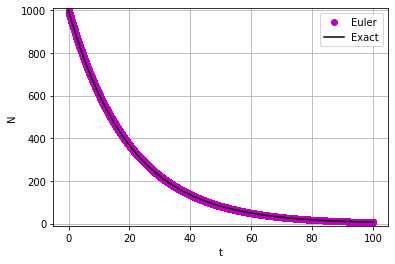

In [ ]:
plt.plot(t,N,'mo',label='Euler')
plt.plot(t,NExact,'k',label='Exact')
plt.xlabel('t')
plt.ylabel('N')
plt.legend()
plt.axis([-5,105,-10,1010])
plt.grid('on')

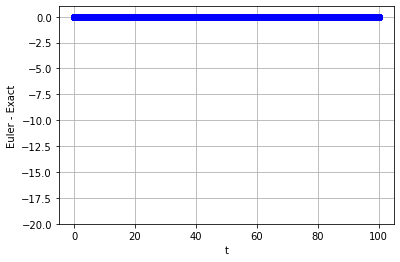

In [ ]:
plt.plot(t,N-NExact,'bo')
plt.xlabel('t')
plt.ylabel('Euler - Exact')
plt.axis([-5,105,-20,1])
plt.grid('on')

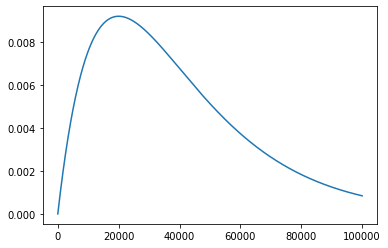

In [ ]:
plt.plot(np.abs(N-NExact))

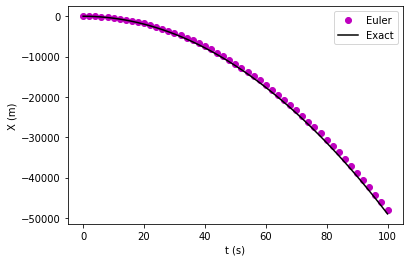

In [ ]:
# second order deq example
# falling ball

import numpy as np
import matplotlib.pyplot as pl

# set parameters
g = 9.8
X0 = 0.
V0 = 0.
dt  = 2
tfinal = 100.

# initialize arrays
t = np.arange(0.,tfinal+dt,dt)
npoints = len(t)
X = np.zeros(npoints)
V = np.zeros(npoints)
XExact = X0 + V0*t - 0.5*g*t**2

# Euler's method solution
X[0] = X0
V[0] = V0
for i in range(npoints-1):
    X[i+1] = X[i] + V[i]*dt
    V[i+1] = V[i] - g*dt

# plot the results
plt.ion()
plt.plot(t,X,'mo',label='Euler')
plt.plot(t,XExact,'k',label='Exact')
plt.xlabel('t (s)')
plt.ylabel('X (m)')
plt.legend()

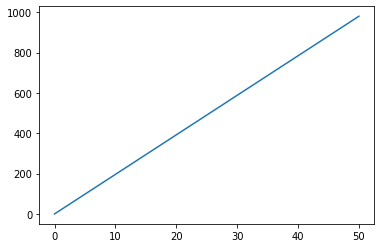

In [ ]:
plt.plot(np.abs(X-XExact))

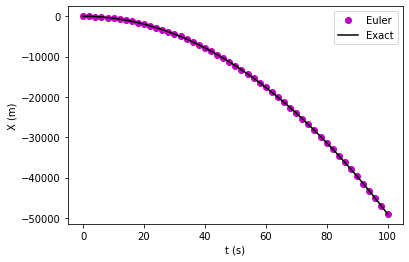

In [ ]:
# second order deq example
# falling ball
# program updated to use second order Runge-Kutta

import numpy as np
import matplotlib.pyplot as pl

# set parameters
g = 9.8
X0 = 0.
V0 = 0.
dt  = 2.
tfinal = 100.

# initialize arrays
t = np.arange(0.,tfinal+dt,dt)
npoints = len(t)
X = np.zeros(npoints)
V = np.zeros(npoints)
XExact = X0 + V0*t - 0.5*g*t**2

# SECOND ORDER RUNGE_KUTTA SOLUTION
X[0] = X0
V[0] = V0
for i in range(npoints-1):
    # compute midpoint velocity
    Vmid = V[i] - 0.5*g*dt  
    # use midpoint velocity to advance position
    X[i+1] = X[i] + Vmid*dt
    V[i+1] = V[i] - g*dt

# plot the results
plt.ion()
plt.plot(t,X,'mo',label='Euler')
plt.plot(t,XExact,'k',label='Exact')
plt.xlabel('t (s)')
plt.ylabel('X (m)')
plt.legend()

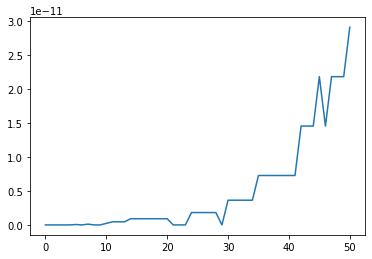

In [ ]:
plt.plot(np.abs(X-XExact))

## One-step numerical methods

Finally, we are prepared to discuss some numerical methods to
approximate the solution to all these ODEs. To simplify the notation,
we present our methods in the context of the scalar equation
\begin{equation*}
{\dot x}(t) = f (t, x)
\end{equation*}
with the initial condition $x(t_0) = x_0$. All the algorithms
generalize trivially to systems: simply replace scalars with vectors.
When computing approximate solutions to the initial value problem, we
will not obtain the solution for every value of $t > t_0$, but only on
a discrete grid.\footnote{The field of asymptotic analysis delivers
  approximations in terms of elementary functions that can be highly
  accurate; these are typically derived in a non-numerical fashion,
  and often have the virtue of accurately identifying leading order
  behavior of complicated solutions. For a beautiful introduction to
  this important area of applied mathematics, see Carl M. Bender and
  Seven A. Orszag, Advanced Mathematical Methods for Scientists and
  Engineers; McGraw-Hill, 1978; Springer, 1999.} In particular, we
will generate approximate solutions at some regular grid of time steps
\begin{equation*}
t_k = t_0 + kh
\end{equation*}
for some constant step-size $h$. (Actually, the methods we consider in
this subsection actually allow $h$ to change with each step size, so
one actually has $t_k = t_{k-1} + h$. For simplicity of notation, we
will assume for now that the step-size is fixed.)

The approximation to $x$ at the time $t_k$ is denoted by $x_k$, so hopefully
\begin{equation*}
x_k \approx x(t_k).
\end{equation*}
Of course, the initial data is exact:
\begin{equation*}
x_0 = x(t_0).
\end{equation*}

## Euler's method

We need some approximation that will advance from the exact point on
the solution curve, $(t_0 , x_0)$ to time $t_1$. Recall from introductory 
calculus that
\begin{equation}
{\dot x}(t) = \lim_{h\rightarrow0} \frac{x(t + h) - x(t)}{h}.
\end{equation}
This definition of the derivative inspires our first method. Apply it
at time $t_0$ with our small but finite time step $h$ to obtain
\begin{equation}
{\dot x}(t_0) \approx  \frac{x(t_0 + h) - x(t_0)}{h}.
\end{equation}
Since $x(t_0) = f(t_0 , x(t_0)) = f (t_0, x_0)$, we have access to the
quantity on the left hand side of this approximation. The only
quantity we don't know is $x(t_0 + h) = x(t_1)$. Rearranging the above
to put $x(t_1)$ on the left hand side, we obtain
\begin{equation}
x(t_1) \approx x(t_0)  + h{\dot x}(t_0) = x_0 + hf(t_0, x_0).
\end{equation}
This approximation is precisely the one suggested by the direction
field discussion above. There, to progress from the starting point
$(t_0, x_0)$, we followed the line of slope $f(t_0, x_0)$ some
distance, which in the present context is our step size, $h$. To
progress from the new point, $(t_1, x_1)$, we follow a new slope,
$f(t_1, x_1)$, giving the iteration
\begin{equation}
x_2 = x_1 + hf(t_1, x_1).
\end{equation}
There is an important distinction here. Ideally, we would have derived
our value of $x_2 \approx x(t_2)$ from the formula
\begin{equation}
x(t_2) \approx x(t_1) + hf(t_1, x(t_1)).
\end{equation}

However, an error was
made in the computation of $x_1 \approx x(t_1)$; we do not have access
to the exact value $x(t_1)$. Thus, compute $x_2$ from $x_1$, the
quantity we have access to. This might seem like a minor distinction,
but in general the difference between the approximation $x_k$ and the
true solution $x(t_k)$ is vital. At each step, a local error is made
due to the approximation of the derivative by a line. These local
errors accumulate, giving global error. Is a small local error enough
to ensure small global error? This question will be addressed below.

Given the approximation $x_2$, repeat the same procedure to obtain $x_3$, 
and so on. Formally, the Euler's Method algorithm is
\begin{equation}
\boxed{x_{k+1} = x_k + hf(t_k, x_k)}.
\end{equation}

Although Euler’s method is seldom used in practice any longer, it is a
great introduction to computational mathematics. We will use it to
solve a single variable, ordinary differential equation of the form,
\begin{equation}
  \dfrac{d}{dt} x = f(t,x), \quad a \le t \le b, \quad x(a) = \alpha
\end{equation}
The differential equation describes how the derivative of $x$ behaves,
as a function of an independent variable, $t$, and the function
$x(t)$. We would like to determine the function $x(t)$ for the initial
condition $x(a)=\alpha$, on the domain $a \le t \le b$.

Euler's method divides the domain into $N$ pieces of size $h$. If the
domain is given by $[a,b]$, then the step size is given by
$h=(b-a)/N$.  Using this definition for our computation
mesh\index{mesh}, we can then write the algorithm more succinctly as,
\begin{align*}
  x_{0} &= \alpha \\ s_{i+1} &= s_{i} + h f( t_{i}, s_{i} ), \mbox{
    for } i \in [0,N).
\end{align*}
Using this expression, we can step through the independent variable,
$t$, and evaluate the derivative, $f(t,x)$, to obtain an approximation
$x_{i} \approx x(t)$, given that we have some initial starting point in
the form of $x(a)=\alpha$.

Suppose we have a differential equation of the form,
\begin{equation}
  {\dot x} = x - t^{2} + 1, \quad 0 \le t \le 2, \quad f(0) = 0.5.
  \label{eq:odeex2}
\end{equation}
For reference, the analytical solution is $x(t)=(t+1)^{2}-0.5e^{t}$.

Below, we present an implementation of the above method using Python:

In [ ]:
import numpy as np

# Euler's method
def euler_mthd( f, a, b, N, IV ):
    h = (b-a)/float(N)          # determine step-size
    t = np.arange( a, b+h, h )  # create mesh
    x = np.zeros((N+1,))        # initialize x
    t[0], x[0] = IV             # set initial values
    for i in range(1,N+1):      # apply Euler's method
        x[i] = x[i-1] + h * f( t[i-1], x[i-1] )
    return t, x                 # Return mesh and solution


We define the left-hand side of our first-order differential equation as the following function:

In [ ]:
# The ordinary differential equation
def f( t, x ):
    return x - t**2 + 1

Alternatively, we can use a lambda expression to define this "on the fly".  I'll give an example of this later on.  The following code defines the initial and value and range of the independent variable.  This is following by a call to our Euler algorithm.

In [ ]:
# Define the initial values and mesh

# limits: 0.0 <= t <= 2.0
a = 0.0
b = 2.0
 
# steps
N = 100

# initial value: y(0.0) = 0.5
IV = (0.0,0.5)

# Do the computation
t, x = euler_mthd(f, a, b, N, IV)

# The exact solution for this initial value
def exact( t ):
    return (t+1.0)**2.0-0.5*np.exp(t)

We may view the results of Euler's method and the exact result graphically:

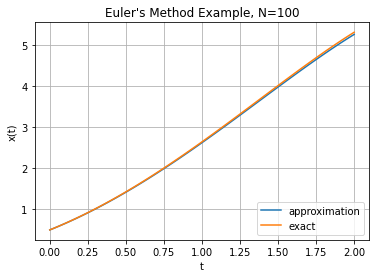

In [ ]:
# Plot the Euler solution

from matplotlib.pyplot import *

plot( t, x, label='approximation' )
plot( t, exact(t), label='exact' )
title( "Euler's Method Example, N="+str(N) )
xlabel('t') 
ylabel('x(t)')
legend(loc=4)
grid()
savefig( 'euler_example.png', fmt='PNG', dpi=100 )


In [ ]:
show()

# Analysis of one-step integrators

So the Taylor method does much better than Euler, but the high-order
derivatives must be computable.  This is often not the case.

To obtain increased accuracy in Euler's method,
\begin{equation}
x_{k+1} = x_k + hf (t_k, x_k),
\end{equation}
one might naturally reduce the step-size, $h$. Since this method was
derived from a first-order approximation to the derivative, we might
expect the error to decay linearly in $h$. Before making this
rigorous, let us first think about better approaches: we are rarely
satisfied with order-$h$ accuracy!  By improving upon Euler's method,
we hope to obtain an improved solution while still maintaining a large
time-step. The first modification we present may not look like such a
big improvement: simply replace $f(t_k, x_k)$ by $f(t_{k+1} ,
x_{k+1})$ to obtain $x_{k+1} = x_k + h f(t_{k+1}, x_{k+1})$, called
the {\it backward} Euler method.  Because $x_{k+1}$ depends on the value $f
(t_{k+1}, x_{k+1})$, this scheme is called an {\it implicit method};
to compute $x_{k+1}$, one needs to solve a (generally nonlinear)
system of equations, rather more involved than the simple update
required for the forward Euler method.  Implicit methods often require
iteration and therefore are more expensive than {\it explicit} methods.

However, one can improve upon the explicit Euler-like methods by
averaging the updates they make to $x_k$:
\begin{equation}
x_{k+1} = x_k + \frac12 h\left[f(t_k, x_k) + f(t_{k+1}, x_{k+1})\right].
\end{equation}
This method is the trapezoid rule, for it can be derived by
integrating the equation $x^\prime(t) = f(t, x(t))$,
\begin{equation}
\int^{t_{k+1}}_{t_k} dt\, x^\prime(t) = \int^{t_{k+1}}_{t_k} dt\, f(t,
x(t))
\end{equation}
and approximating the integral on the right using the trapezoid
rule. The fundamental theorem of calculus gives the exact formula for
the integral on the left, $x(t_{k+1}) - x(t_k)$, which can be approximated
by $x_{k+1} - x_k$. Rearranging these equations results in the trapezoid
rule for $x_{k+1}$.  

Like the backward Euler method, the trapezoid rule is implicit, due to
the $f(t_{k+1}, x_{k+1})$ term. To obtain a similar explicit method,
one can replace $x_{k+1}$ by its approximation from the explicit Euler
method:
\begin{equation}
f(t_k + h, x_{k+1}) \approx f\left(t_k + h, x_k + hf (t_k , x_k)\right).
\end{equation}
The result is called {\it Heun's method} or the {\it improved Euler method}:
[FYI: {\it Heun} rhymes with {\it coin}.]
\begin{equation}
x_{k+1} = x_k + \frac12 h \left[f(t_k, x_k) + f\left(t_k + h, x_k + hf (t_k, x_k)\right)\right].
\end{equation}
Note that this method can be implemented using only two evaluations of
the function $f(t, x)$.

The midpoint method is the simplest of these schemes.  It uses
an Euler step to evaluate the derivative in the midpoint of the
interval as follows:
\begin{align*}
  x_{0} &= \alpha \\ x_{i+1} &= x_{i} + h f \Bigl( t_{i} +
  \frac{h}{2}, x_{i} + \frac{h}{2} f( t_{i}, x_{i} ) \Bigr) \\
\end{align*}

We may implement it in Python as follows:

In [ ]:
import numpy as np

def midpoint_method( f, a, b, N, IV ):
    h = (b-a)/float(N)          # determine step-size
    t = np.arange( a, b+h, h )  # create mesh
    x = np.zeros((N+1,))        # initialize x
    t[0], x[0] = IV             # set initial values
    for i in range(1,N+1):      # apply Midpoint Method
        x[i] = x[i-1] + h * f( t[i-1] + h/2.0, x[i-1] + \
                               h * f( t[i-1], x[i-1] ) / 2.0 )
    return t, x                 # Return mesh and solution

## The Modified Euler Method

The modified Euler method is the average of the midpoint method
and the Euler method:
\begin{align*}
  x_{0} &= \alpha \\ x_{i+1} &= x_{i} + \frac{h}{2} \biggl[ f( t_{i},
  x_{i} ) + f\Bigl( t_{i+1}, x_{i} + h
  f( t_{i}, x_{i} ) \Bigr) \biggr] \\
\end{align*}

In Python, we have:

In [ ]:
import numpy as np

def modified_euler_method( f, a, b, N, IV ):
    h = (b-a)/float(N)          # determine step-size
    t = np.arange( a, b+h, h )  # create mesh
    x = np.zeros((N+1,))        # initialize x
    t[0], x[0] = IV             # set initial values
    for i in range(1,N+1):      # apply Modified Euler Method
        f1 = f( t[i-1], x[i-1] )
        f2 = f( t[i], x[i-1] + h * f1 )
        x[i] = x[i-1] + h * ( f1 + f2 ) / 2.0
    return t, x                 # Return mesh and solution


## Heun's Method

This method weights the average toward the midpoint evaluation:
\begin{align*}
  x_{0} & = \alpha \\ x_{i+1} & = x_{i} + \frac{h}{4} \biggl[
  f(t_{i},x_{i}) + 3f\Bigl( t_{i} +
  \frac{2}{3} h, x_{i} + \frac{2}{3} h f(t_{i},x_{i}) \Bigr) \biggr]
  \\
\end{align*}

And in Python:

In [ ]:
import numpy as np

def heun_method( f, a, b, N, IV ):
    h = (b-a)/float(N)          # determine step-size
    t = np.arange( a, b+h, h )  # create mesh
    x = np.zeros((N+1,))        # initialize x
    t[0], x[0] = IV             # set initial values
    for i in range(1,N+1):      # apply Heun's Method
        f1 = f( t[i-1], x[i-1] )
        f2 = f( t[i-1] + (2.0/3.0) * h, \
                x[i-1] + (2.0/3.0) * h * f1 )
        x[i] = x[i-1] + h * ( f1 + 3.0 * f2 ) / 4.0
    return t, x                 # Return mesh and solution


![alt text](http://www.physics.drexel.edu/~steve/Courses/Comp_Phys/Integrators/rk4.gif)

\begin{equation*}
x_{k+1} = x_k + \frac16 h\left(k_1 + 2k_2 + 2k_3 + k_4\right),
\end{equation*}
where
\begin{eqnarray*}
  k_1 &=& f(t_k, x_k) \\
  k_2 &=& f(t_k+\frac12h, x_k + \frac12hk_1) \\
  k_3 &=& f(t_k+\frac12h, x_k + \frac12hk_2) \\
  k_4 &=& f(t_k + h, x_k + hk_3).
\end{eqnarray*}


The formal mathematical analysis for each of these schemes shows the
various combinations effectively remove errors corresponding to Taylor
series terms of various order.  The Runge-Kutta formalism takes
advantage of this realization to derive high-order methods without
requiring high-order derivatives as in the Taylor Method.  The most
commonly used is the 4th-order scheme:
\begin{align*}
  x_{0} &= \alpha \\ k_{1} &= h f( t_{i}, x_{i} ) \\ k_{2} &= h f
  \biggl( t_{i} + \frac{h}{2}, x_{i} + \frac{1}{2} k_{1} \biggr)
  \\ k_{3} &= h f \biggl( t_{i} + \frac{h}{2}, x_{i} + \frac{1}{2}
  k_{2} \biggr) \\ k_{4} &= h f( t_{i+1}, x_{i}+k_{3} ) \\ x_{i+1} &=
  x_{i} + \frac{1}{6} \bigl( k_{1} + 2k_{2} + 2k_{3} + k_{4} \bigr)
  \\
\end{align*}

We must address an important consideration: the greater a method's
accuracy, the more evaluations of the function $f$ per step are
required. In real applications, it is often computationally
expensive to evaluate that function $f$. Thus one is forced to make a
trade-off: methods with greater accuracy allow for larger time-step
$h$, but require more function evaluations per time step. To
understand the interplay between accuracy and computational expense,
we require a more nuanced understanding of the convergence behavior of
these various methods.

In [ ]:
import numpy as np

def runge_kutta_4_method( f, a, b, N, IV ):
    h = (b-a)/float(N)          # determine step-size
    t = np.arange( a, b+h, h )  # create mesh
    x = np.zeros((N+1,))        # initialize x
    t[0], x[0] = IV             # set initial values
    # apply Fourth Order Runge-Kutta Method
    for i in range(1,N+1):
        k1 = h * f( t[i-1], x[i-1] )
        k2 = h * f( t[i-1] + h / 2.0, x[i-1] + k1 / 2.0 )
        k3 = h * f( t[i-1] + h / 2.0, x[i-1] + k2 / 2.0 )
        k4 = h * f( t[i], x[i-1] + k3 )
        x[i] = x[i-1] + ( k1 + 2.0 * k2 + 2.0 * k3 + k4 ) / 6.0
    return t, x


# Summary

The following script compars of the relative errors for all the
methods so far:

In [ ]:
from collections import OrderedDict
from IPython.display import HTML, display

# relative error computation
error_rel = lambda x, y: np.sum( np.abs( x - y ) / np.abs( x ) )

# save relative error value in order of insertion
e = OrderedDict()

t, x = euler_mthd( f, a, b, N, IV )
e['Euler'] = error_rel(exact(t), x)

# Provide the ODE function and derivatives for Taylor's method
f   = lambda t, x: x - t**2.0 + 1
df  = lambda t, x: x - t**2.0 + 1 - 2*t
ddf = lambda t, x: x - t**2.0 - 2*t - 1

t, x = midpoint_method( f, a, b, N, IV )
e['Midpoint'] = error_rel(exact(t), x)

t, x = modified_euler_method( f, a, b, N, IV )
e['Modified'] = error_rel(exact(t), x)

t, x = heun_method( f, a, b, N, IV )
e['Heun'] = error_rel(exact(t), x)

t, x = runge_kutta_4_method( f, a, b, N, IV )
e['4th-order R-K'] = error_rel(exact(t), x)

# Make an array of arrays to display our results in a table
output = [["METHOD", "RELATIVE ERROR"], ["", ""]]
for k in e:
    output.append([k, "{:10g}".format(e[k])])

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in output)
        )
 ))

METHOD,RELATIVE ERROR
,
Euler,0.722245
Midpoint,0.00268413
Modified,0.00921544
Heun,0.00486124
4th-order R-K,1.40903e-07


The improved Euler methods (midpoint, modified
Euler, Heun) all do better than the original Euler, but the 4th-order
Runge Kutta, constructed to cancel out terms in the Taylor series,
works the best of all.